In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np


2022-06-20 18:01:09.058664: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-20 18:01:09.058698: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
import cv2
import os

from tensorflow.keras.callbacks import TensorBoard
import time

NAME = "Faces-cnn-32x1-64x1-{}".format(int(time.time()))

TENSORBOARD = TensorBoard(log_dir='logs/{}'.format(NAME))

In [3]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)
validate = ImageDataGenerator(rescale=1/255)

print (train)

In [9]:
train_ds = train.flow_from_directory("./todaslascaras/prepro-2.0", 
                                     target_size=(150,150), 
                                     batch_size=3, 
                                     class_mode='categorical')

validate_ds = validate.flow_from_directory("./todaslascaras/validation", 
                                     target_size=(150,150), 
                                     batch_size=3, 
                                     class_mode='categorical')

Found 4296 images belonging to 8 classes.
Found 1327 images belonging to 8 classes.


In [10]:
train_ds.class_indices 

{'anger': 0,
 'fear': 1,
 'happy': 2,
 'joy': 3,
 'kiss': 4,
 'neutral': 5,
 'sadness': 6,
 'surprise': 7}

In [11]:
model = tf.keras.Sequential([
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128),
  layers.Dropout(0.5),  
  layers.Dense(8, activation='softmax')
])


In [12]:
model.compile(optimizer='adam',
              loss= 'categorical_crossentropy',
              metrics=['accuracy'])


In [13]:
history = model.fit(
    train_ds,
    validation_data=validate_ds,
    batch_size=16, 
    epochs=10,
    callbacks=[TENSORBOARD]    
)


Epoch 1/10
1432/1432 [==============================] - 129s 90ms/step - loss: 1.5757 - accuracy: 0.4392 - val_loss: 0.9484 - val_accuracy: 0.6835
Epoch 2/10
1432/1432 [==============================] - 128s 89ms/step - loss: 0.6495 - accuracy: 0.7779 - val_loss: 0.7674 - val_accuracy: 0.7935
Epoch 3/10
1432/1432 [==============================] - 126s 88ms/step - loss: 0.3676 - accuracy: 0.8729 - val_loss: 0.7595 - val_accuracy: 0.8282
Epoch 4/10
1432/1432 [==============================] - 126s 88ms/step - loss: 0.2378 - accuracy: 0.9181 - val_loss: 0.9882 - val_accuracy: 0.8440
Epoch 5/10
1432/1432 [==============================] - 126s 88ms/step - loss: 0.1890 - accuracy: 0.9344 - val_loss: 0.9515 - val_accuracy: 0.8410
Epoch 6/10
1432/1432 [==============================] - 126s 88ms/step - loss: 0.1434 - accuracy: 0.9548 - val_loss: 1.0721 - val_accuracy: 0.8576
Epoch 7/10
1432/1432 [==============================] - 126s 88ms/step - loss: 0.1085 - accuracy: 0.9658 - val_loss: 1

#### Primer modelo con accuracy = 60% (~500 img x clase)
- naranja = train
- celeste = validation

 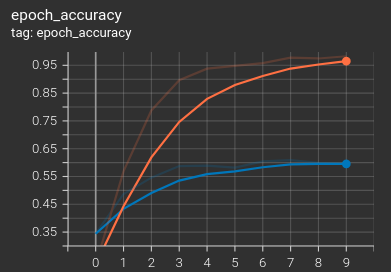 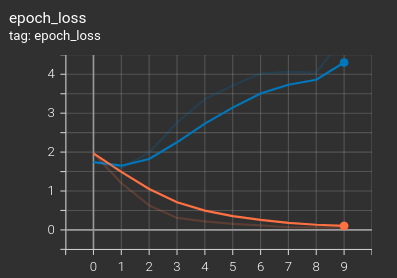

#### Segundo modelo con accuracy = 85% (~800 img x clase)
- naranja oscuro = train
- azul= validation
 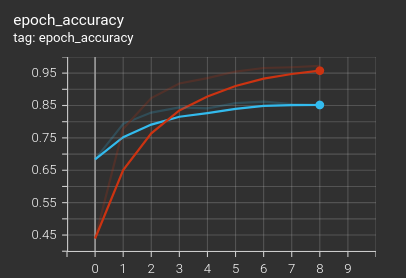 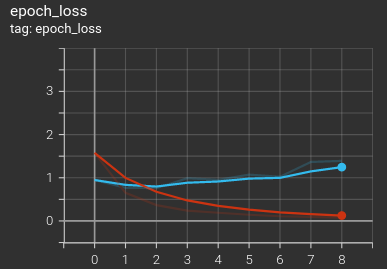

In [33]:
!mkdir -p saved_model
model.save('saved_model/my_model')

2022-06-20 20:04:46.572676: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: saved_model/my_model/assets


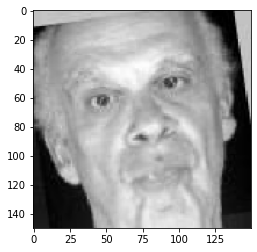

Esta cara probablemente coincida con: kiss


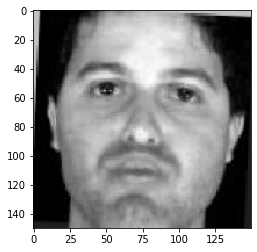

Esta cara probablemente coincida con: kiss


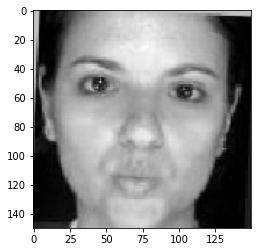

Esta cara probablemente coincida con: kiss


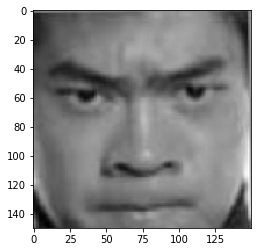

Esta cara probablemente coincida con: neutral


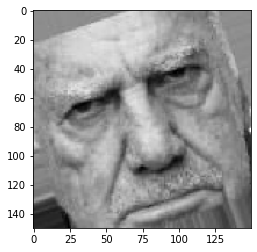

Esta cara probablemente coincida con: anger


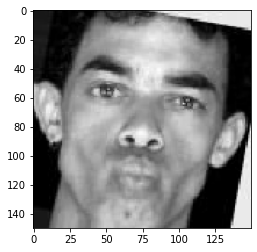

Esta cara probablemente coincida con: kiss


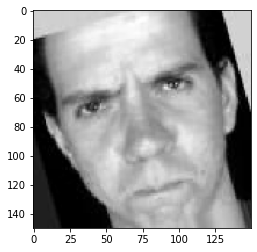

Esta cara probablemente coincida con: anger


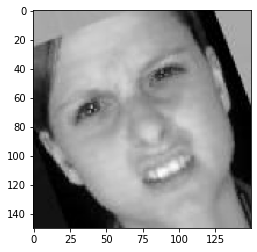

Esta cara probablemente coincida con: anger


In [57]:
#Tomo una imagen cualquiera y trato de identificar que tipo de clase es:
path = "./todaslascaras/test"
for i in os.listdir(path):
    img = image.load_img(path + '/' + i, target_size=(150,150))
    plt.imshow(img)
    plt.show()

    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    imagenes = np.vstack([x])
    val =  model.predict(imagenes)

    score = tf.nn.softmax(val[0]) # # get softmax for each output
    for c in train_ds.class_indices:
        if (train_ds.class_indices[c] == np.argmax(score)):
            print("Esta cara probablemente coincida con: " + c)

